<a href="https://colab.research.google.com/github/janiosl/python.ds/blob/master/estatistica/me/est_tarefa_aula06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CEFET-RJ**

**Programa de Pós-Gradução em Ciência da Computação - PPCIC**

**Mestrado em Ciência da Computação**

**Disciplina: Métodos Estatísticos - 2021/2**

* **Exercícios - Aula 06**
* **Prof.: Diego Barreto Haddad**
* **Aluno: Janio de Souza Lima**



---

## Preparação do ambiente e funções gerais

In [1]:
#Carga de bibliotecas usadas nas questões
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Definindo uma semente para reprodutibilidade dos aleatórios
np.random.seed(31)

In [3]:
def padrao(X, mu, sigma):
  """
  Função de transformação para normal padrão
  X: Variável aleatória que será transforamda
  mu: média da variável aleatória
  sigma: desvio padrão da variável aleatória
  """
  Z = (X-mu)/sigma
  return Z


def probMonteCarlo_unico(x, z, dir=0):
  """
  Função para cálculo da probabilidade de ocorrência de um valor
  x = conjunto de dados
  z = valor a ser analisado
  dir:
    0: <=
    1: <
    2: >=
    3: >
  """
  N = len(x)
  if dir == 0:
    #Quantidade de valores de x abaixo de z
    obsIntervalo = len(x[x<=z])
  elif dir == 1:
    obsIntervalo = len(x[x<z])
  elif dir == 2:
    obsIntervalo = len(x[x>=z])
  elif dir == 3:
    obsIntervalo = len(x[x>z])
  else:
    #Valor inválido
    return None
  
  probX = np.round(obsIntervalo/N,4)

  return probX


def probMonteCarlo_duplo(x, li, ls):
  """
  Função para cálculo da probabilidade de ocorrência de um intervalo
  x = conjunto de dados
  li = limite inferior da área desejada
  ls = limite superior da área desejada
  """
  N = len(x)
  #Quantidade de valores de x acima de li e abaixo de ls
  obsIntervalo = len(x[x>=li]) - len(x[x>=ls])

  probX = np.round(obsIntervalo/N, 4)
  return probX

## Questão 1:

Seja uma variável aleatória gaussiana $X$ com média e desvio padrão unitários.

In [4]:
mu = 1.0 #Média
sigma = 1.0 #Desvio padrão

### a) Apelando à Tabela A.3, calcule $Prob\{X \leq 1\}$

Transformação do valor $X=1$ para uma distribuição normal padrão, com $\mu=0$ e $sigma = 1$.

In [5]:
X = 1
Z = padrao(X, mu, sigma)
Z

0.0

Pela tabela A.3 [Walpole et al., 2012] para $z=0$ a probabilidade é $0.5$, ou seja, considerando que a distribuição é centrada na média igual a 0, a $Prob\{Z \leq 0\} = 0.5$, então para a distribuição gaussiana com $\mu = 1$ e $\sigma=1$, a $Prob\{X \leq 1 \} \approx 0.5$.

### b) Desenvolver programa para responder a questão usando ensaios de Monte Carlo

Geração de valores aleatórios para a distribuição solicitada.

In [6]:
N = 1000000 #Quantidade de números aleatórios
x = np.random.normal(mu, sigma, size=N) #Geração dos números aleatórios

Visualização do histograma e da densidade de probabilidade dos números aleatórios gerados originalmente.

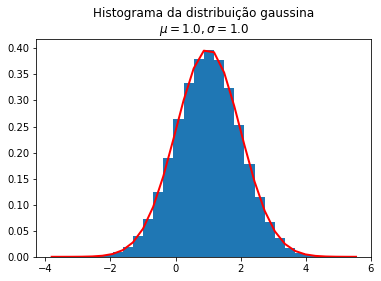

In [7]:
#Histograma
plt.title(f'Histograma da distribuição gaussina\n$\mu={mu}, \sigma={sigma}$')
count, bins, ignored = plt.hist(x, 30, density=True)

#Função densidade de probabilidade
plt.plot(bins, 1/(sigma * np.sqrt(2* np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')

Visualização do histograma dos números aleatórios transformados para uma distribuição normal padrão.

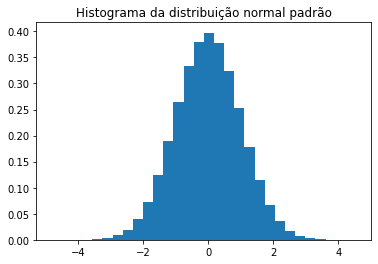

In [8]:
#Transformação de x em uma normal padrão
#z = (x-mu)/sigma
z = padrao(x, mu, sigma)

#Histograma da variável transformada
plt.title('Histograma da distribuição normal padrão')
count, bins, ignored = plt.hist(z, 30, density=True)

Cálculo da proporção de observações no intervalo desejado (baseado nos valores aleatórios originais):

In [9]:
p = probMonteCarlo_unico(x, X, dir=0)
p

0.4993

Pelos cálculos realizados usando ensaios de Monte Carlos chegamos a conclusão que $Prob\{X \leq 1\} \approx 0.5$.

## Questão 2:

Seja uma variável aleatória gaussiana $X$ com média e desvio padrão unitários.

### a) Apelando à Tabela A.3, calcule $Prob\{-2 \leq X \leq 0.5\}$

In [10]:
#Reaproveitamento do parâmetros usados na questão 1
print(f'mu: {mu}\nsigma: {sigma}')

mu: 1.0
sigma: 1.0


In [11]:
#Definição dos limites de acordo com o enunciado
li = -2  #Limite inferior
ls = 0.5 #Limite superior

In [12]:
liZ = padrao(li, mu, sigma)
lsZ = padrao(ls, mu, sigma)
print(liZ, lsZ)

-3.0 -0.5


Pela tabela A.3 [Walpole et al., 2012] temos o seguinte:

* Para $z=-3$ a probabilidade é $0.0013$;
* Para $z=-0.5$ a probabilidade $0.3085$
* Analisando a probabilidade dos valores de $Z$ obtidos, considerando que a distribuição é centrada na média igual a $0$ e que a área total sob a curva é unitária, concluídos que a $Prob\{-3 \leq Z \leq -0.5\} = 0.3072$, então para a distribuição gaussiana com $\mu = 1$ e $\sigma=1$, a $Prob\{-2 \leq X \leq 0.5\} \approx 0.3072$.

### b) Desenvolver programa para responder a questão usando ensaios de Monte Carlo

Para resolução da questão através de ensaios de Monte Carlo, reaproveitaremos os valores aleatórios já gerados na questão 1, tendo em vista que a distribuição possui os mesmos valores de $\mu = 1$ e $\sigma = 1$. Desta forma, atualizaremos os cálculos apenas para verificar o intervalo solicitado para $Prob\{-2 \leq X \leq 0.5\}$.

Visualização do histograma e da densidade de probabilidade dos números aleatórios gerados originalmente.

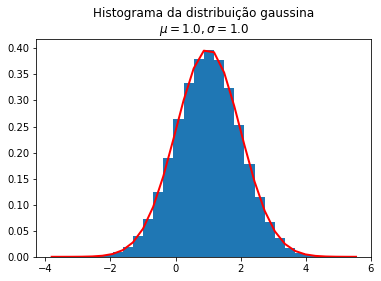

In [13]:
#Histograma
plt.title(f'Histograma da distribuição gaussina\n$\mu={mu}, \sigma={sigma}$')
count, bins, ignored = plt.hist(x, 30, density=True)

#Função densidade de probabilidade
plt.plot(bins, 1/(sigma * np.sqrt(2* np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')

Inicialmente calcularemos todos os valores que estarão no espaço sob a curva a partir do ponto -2

In [14]:
#Quantidade de valores de x acima de -2
len(x[x>=li])

998660

O valor obtido na saída anterior, indica quantas observações das $1000000$  estão a partir de -2. Portanto, para obter o valor no intervalo desejado, vamos verificar os valores que estão acima do limite superior $0.5$.

In [15]:
#Quantidade de valores de x acima de 0.5
len(x[x>=ls])

691638

Nessa etapa verificamos a quantidade de observações que estão a partir do valor $0.5$. Com estes dados, para descobrirmos os valores no intervalo $[-2,0.5]$, considerando que as observações de $X\geq-2$ contém as observações de $X \leq 0.5$, basta excluirmos os valores que estejam acima deste intervalo que o que sobrará serão exatamente os valores que atendem ao enunciao $-2 \leq X \leq 0.5$.

In [16]:
p = probMonteCarlo_duplo(x, li, ls)
p

0.307

Pelos cálculos realizados usando ensaios de Monte Carlos chegamos a conclusão que $Prob\{-2\leq X \leq0.5\} \approx 0.307$.

## Questão 3:

Seja uma variável aleatória gaussiana $X$ com média $\mu = 50$ e desvio padrão $\sigma = 5$.

In [17]:
N = 1000000 #Quantidade de números aleatórios
mu = 50 #Média
sigma = 5 #Desvio padrão

### a) Apelando à Tabela A.3, calcule $Prob\{X \leq 51\}$

Transformação do valor $51$.

In [18]:
Z = padrao(51, mu, sigma)
Z

0.2

Pela aplicação da tabela A.3, para o valor de $z=0.2$ obtemos o valor da área sob a curva normal de $0.5793$.

### b) Desenvolver programa para responder a questão usando ensaios de Monte Carlo

Geração de valores aleatórios para a distribuição solicitada.

In [19]:
x = np.random.normal(mu, sigma, size=N)

Visualização do histograma e da densidade de probabilidade dos números aleatórios gerados originalmente.

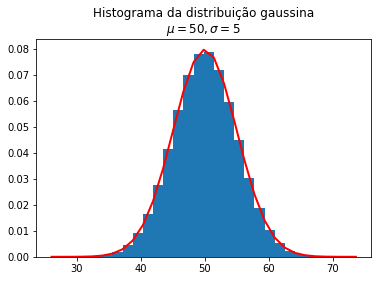

In [20]:
#Histograma
plt.title(f'Histograma da distribuição gaussina\n$\mu={mu}, \sigma={sigma}$')
count, bins, ignored = plt.hist(x, 30, density=True)

#Função densidade de probabilidade
plt.plot(bins, 1/(sigma * np.sqrt(2* np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')

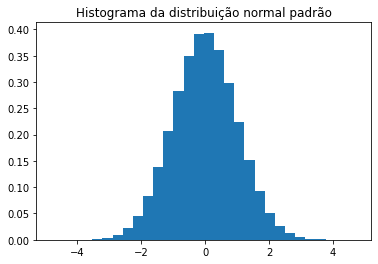

In [21]:
#Transformação de x em uma normal padrão
z = padrao(x, mu, sigma)

#Histograma da variável transformada
plt.title('Histograma da distribuição normal padrão')
count, bins, ignored = plt.hist(z, 30, density=True)

In [22]:
X = 51

In [23]:
p = probMonteCarlo_unico(x, X, dir=0)
p

0.5803

Testando os valores transformando a distribuição para uma normal padrão.

In [24]:
Z = padrao(X, mu, sigma)
Z

0.2

In [25]:
p = probMonteCarlo_unico(z, Z, dir=0)
p

0.5803

Pelos cálculos com ensaios de Monte Carlo chegamos a conclusão que $Prob\{X \leq 51\} \approx 0.58$.

## Questão 4:

Seja uma variável aleatória gaussiana $X$ com média $\mu = -10$ e desvio padrão $\sigma = 2$.

In [26]:
N = 1000000 #Quantidade de números aleatórios
mu = -10 #Média
sigma = 2 #Desvio padrão

### a) Apelando à Tabela A.3, calcule $Prob\{-12 \leq X \leq -9\}$

In [27]:
#Definição dos limites de acordo com o enunciado
li = -12  #Limite inferior
ls = -9 #Limite superior

In [28]:
liZ = padrao(li, mu, sigma)
lsZ = padrao(ls, mu, sigma)
print(liZ, lsZ)

-1.0 0.5


Pela tabela A.3 [Walpole et al., 2012] temos o seguinte:

* Para $z=-1$ a probabilidade é $0.1587$;
* Para $z=0.5$ a probabilidade $0.6915$
* Analisando a probabilidade dos valores de $Z$ obtidos, considerando que a distribuição é centrada na média igual a $0$ e que a área total sob a curva é unitária, concluídos que a $Prob\{-1 \leq Z \leq 0.5\} = 0.5328$, então para a distribuição gaussiana com $\mu = 1$ e $\sigma=1$, a $Prob\{-12 \leq X \leq -9.5\} \approx 0.5328$.

### b) Desenvolver programa para responder a questão usando ensaios de Monte Carlo

In [29]:
x = np.random.normal(mu, sigma, size=N)

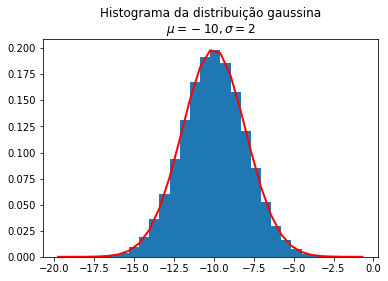

In [30]:
#Histograma
plt.title(f'Histograma da distribuição gaussina\n$\mu={mu}, \sigma={sigma}$')
count, bins, ignored = plt.hist(x, 30, density=True)

#Função densidade de probabilidade
plt.plot(bins, 1/(sigma * np.sqrt(2* np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')

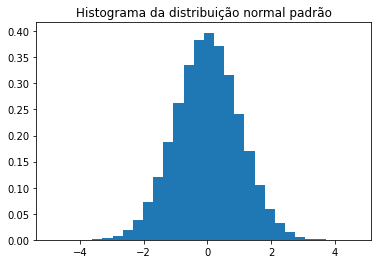

In [31]:
#Transformação de x em uma normal padrão
z = padrao(x, mu, sigma)

#Histograma da variável transformada
plt.title('Histograma da distribuição normal padrão')
count, bins, ignored = plt.hist(z, 30, density=True)

In [32]:
#Quantidade de valores de x acima de -12
len(x[x>=li])

841572

In [33]:
#Quantidade de valores de x acima de -9
len(x[x>=ls])

308708

In [34]:
probMonteCarlo_duplo(x, li, ls)

0.5329

Aplicando os ensaios de Monte Carlos chegamos a conclusão que $Prob\{-12\leq X \leq-9\} \approx 0.5329$.

## Questão 5:

Uma distribuição binomial $X$ apresenta $n=100$. Qual a probabilidade de observarmos $r$ sucessos, com $50 \leq r \leq 60$, para diferentes valores de probabilidade de sucesso $p$?

In [35]:
from scipy import special

In [36]:
def binProb(n, p):
  """
  Função para cálculo direto pela distribuição binomial
  """
  #Distribuição
  x = np.arange(0, n+1, 1)
  #Cálculo das probabilidades
  p_i = np.zeros(n+1)
  for k in x:
    p_i[k]=special.binom(n, k)*(p)**k*(1-p)**(n-k)
  
  return x, p_i

In [37]:
li = 50
ls = 60
n = 100
prob = [0.3, 0.35, 0.4, 0.45, 0.5]

* Cálculos para probabilidade 0.3

In [38]:
x1 = np.random.binomial(n=n, p=prob[0], size=n)

Calculo de $\mu$ e $\sigma$ de acordo com as fórmulas para uma distribuição binomial:


$\mu = np$

$\sigma = \sqrt{npq}$, onde $q = 1-p$

In [39]:
mu1 = n*prob[0]
sigma1 = np.sqrt(n*prob[0]*(1-prob[0]))
print(mu1, sigma1)

30.0 4.58257569495584


Probabilidade direta usando a distribuição binomial

In [41]:
_, pbin1 = binProb(n, p=prob[0])

pb1 = 0
for i in range(len(pbin1)):
  if (i>=50 and i<=60):
    pb1 += pbin1[i]

np.round(pb1, 4)

0.0

* Probabilidade por aproximação gaussiana

In [42]:
liz = padrao(li, mu1, sigma1)
lsz = padrao(ls, mu1, sigma1)
print(liz, lsz)

4.364357804719848 6.546536707079771


In [43]:
z1 = padrao(x1, mu1, sigma1)

pg1 = probMonteCarlo_duplo(z1, liz, lsz)
pg1

0.0

* Cálculos para probabilidades de 0.35, 0.4 e 0.45:

Probabilidades usando a distribuição binomial

In [44]:
#Criação da distribuição binomial para cada valor de p
x2 = np.random.binomial(n=n, p=prob[1], size=n)
x3 = np.random.binomial(n=n, p=prob[2], size=n)
x4 = np.random.binomial(n=n, p=prob[3], size=n)

In [45]:
#Cálculo da média e desvio padrão para cada p
mu2 = n*prob[1]
sigma2 = np.sqrt(n*prob[1]*(1-prob[1]))

mu3 = n*prob[2]
sigma3 = np.sqrt(n*prob[2]*(1-prob[2]))

mu4 = n*prob[3]
sigma4 = np.sqrt(n*prob[3]*(1-prob[3]))

In [46]:
#============================
#p = 0.35
#============================
_, pbin2 = binProb(n, p=prob[1])

pb2 = 0
for i in range(len(pbin2)):
  if (i>=50 and i<=60):
    pb2 += pbin2[i]

In [47]:
#============================
#p = 0.40
#============================
_, pbin3 = binProb(n, p=prob[2])

pb3 = 0
for i in range(len(pbin3)):
  if (i>=50 and i<=60):
    pb3 += pbin3[i]

In [48]:
#============================
#p = 0.45
#============================
_, pbin4 = binProb(n, p=prob[3])

pb4 = 0
for i in range(len(pbin4)):
  if (i>=50 and i<=60):
    pb4 += pbin4[i]

In [49]:
print(pb2, pb3, pb4)

0.0014504562911965848 0.02708115629457828 0.18178995278726676


Cálculo pela aproximação gaussiana

In [50]:
#============================
#p = 0.35
#============================
#Transformações
z2 = padrao(x2, mu2, sigma2)

liz = padrao(li, mu2, sigma2)
lsz = padrao(ls, mu2, sigma2)

#Cálculo da probabilidade
pg2 = probMonteCarlo_duplo(z2, liz, lsz)


#============================
#p = 0.40
#============================
#Transformações
z3 = padrao(x3, mu3, sigma3)

liz = padrao(li, mu3, sigma3)
lsz = padrao(ls, mu3, sigma3)

#Cálculo da probabilidade
pg3 = probMonteCarlo_duplo(z3, liz, lsz)

#============================
#p = 0.45
#============================
#Transformações
z4 = padrao(x4, mu4, sigma4)

liz = padrao(li, mu4, sigma4)
lsz = padrao(ls, mu4, sigma4)

#Cálculo da probabilidade
pg4 = probMonteCarlo_duplo(z4, liz, lsz)

In [51]:
print(pg2, pg3, pg4)

0.0 0.02 0.23


* Cálculos para probabilidade 0.5

In [52]:
x5 = np.random.binomial(n=n, p=prob[4], size=N)

In [53]:
mu5 = n*prob[4]
sigma5 = np.sqrt(n*prob[4]*(1-prob[4]))
print(mu5, sigma5)

50.0 5.0


In [55]:
#============================
#p = 0.5
#============================
_, pbin5 = binProb(n, p=prob[4])

pb5 = 0
for i in range(len(pbin5)):
  if (i>=50 and i<=60):
    pb5 += pbin5[i]

np.round(pb5, 4)

0.5222

In [56]:
z5 = padrao(x5, mu5, sigma5)

In [57]:
liz = padrao(li, mu5, sigma5)
lsz = padrao(ls, mu5, sigma5)
print(liz, lsz)

0.0 2.0


In [58]:
pg5 = probMonteCarlo_duplo(z5, liz, lsz)
pg5

0.5122

Tabulação dos resultados

In [59]:
import pandas as pd

In [60]:
resultado = pd.DataFrame({'p':[p for p in prob],
                          'Dist. binomial': [pb1, pb2, pb3, pb4, pb5],
                          'Aprox. gaussiana': [pg1, pg2, pg3, pg4, pg5]}
                         )
resultado

,p,Dist. binomial,Aprox. gaussiana
0,0.30,0.000022,0.0000
1,0.35,0.001450,0.0000
2,0.40,0.027081,0.0200
3,0.45,0.181790,0.2300
4,0.50,0.522195,0.5122


#Referências

Jay L. Devore. **Probabilidade e Estatística para engenharia e ciências**. Cengage, 2006.

Pedro A. Morettin, Wilton de O. Bussab. **Estatística Básica**. Saraiva, 2017.

Ronald E. Walpole, Raymond H. Myers, Sharon L. Myers e Keying Ye. **Probability & Statistics for Engineers & Scientistis**. Pearson, 2012.